## Iris Flower Classification
- Iris flower dataset contains 50 instances of 3 classes of Iris plants(Iris-setosa, Iris-versicolor & Iris-virginica)
- Goal of Iris flower classification problem is to classify an unseen Iris plant.
- Keras and Tensorflow is used to develop neural network model for this multi-class classification problem.
- Finally, evaluating the model with kfold cross validation using scikit-learn.

#### Library imports
- Using pandas for data processing
- Keras to build the neural network
- Sklearn to evaluate the build model using Kfold Cross Validation

In [1]:
import pandas
import numpy
import keras
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

Using TensorFlow backend.


Loading the Iris dataset into pandas dataframe

Attribute Information:
1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: 
    - Iris Setosa 
    - Iris Versicolour 
    - Iris Virginica

In [2]:
data = pandas.read_csv("data\iris_dataset.csv", header = None)
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Lets plot the dataset

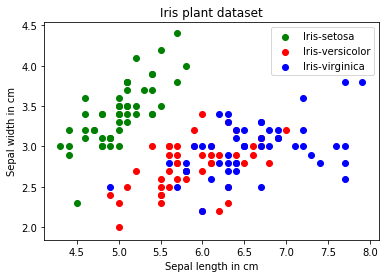

In [41]:
plt.scatter(data.iloc[:,0:1][data[4]=='Iris-setosa'], data.iloc[:,1:2][data[4]=='Iris-setosa'], color ='green' , label='Iris-setosa')
plt.scatter(data.iloc[:,0:1][data[4]=='Iris-versicolor'], data.iloc[:,1:2][data[4]=='Iris-versicolor'], color ='red' , label='Iris-versicolor')
plt.scatter(data.iloc[:,0:1][data[4]=='Iris-virginica'], data.iloc[:,1:2][data[4]=='Iris-virginica'], color ='blue' , label='Iris-virginica')
plt.title("Iris plant dataset")
plt.xlabel("Sepal length in cm")
plt.ylabel("Sepal width in cm")
plt.legend()
plt.show()

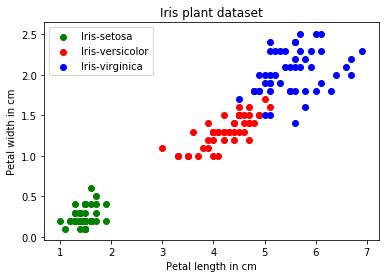

In [42]:
plt.scatter(data.iloc[:, 2:3][data[4]=='Iris-setosa'], data.iloc[:, 3:4][data[4]=='Iris-setosa'], color ='green' , label='Iris-setosa')
plt.scatter(data.iloc[:, 2:3][data[4]=='Iris-versicolor'], data.iloc[:, 3:4][data[4]=='Iris-versicolor'], color ='red' , label='Iris-versicolor')
plt.scatter(data.iloc[:, 2:3][data[4]=='Iris-virginica'], data.iloc[:, 3:4][data[4]=='Iris-virginica'], color ='blue' , label='Iris-virginica')
plt.title("Iris plant dataset")
plt.xlabel("Petal length in cm")
plt.ylabel("Petal width in cm")
plt.legend()
plt.show()

Separating data into input and output variables

In [3]:
dataset = data.values
X = dataset[: , 0:4]
y = dataset[: , 4]

Using one hot encoding for multi-class classification problem

In [4]:
encoder = LabelEncoder()
encoder.fit(y)
encoder_y = encoder.transform(y)
dummy_y = np_utils.to_categorical(encoder_y)

Creating baseline neural network model using keras
- Built sequential model 
- Created simple fully connected network with one hidden layer that contains 8 neurons.
- In the first layer, we are using dense layer with 8 neurons, input dimension as 4 (input features) and activation function
    as relu
- In the second layer i.e the output layer, 3 neurons are used to predict 3 output classes(3 flower categories) with activation function as softmax

In [5]:
def baseline_model():
    model = Sequential()
    model.add(Dense(8, input_dim=4, activation='relu'))
    model.add(Dense(3,activation='softmax'))
    # compile the model
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return model

Creating KerasClassifier for use in scikit-learn 

In [7]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)

Evaluation of the model created using neural networks on training data using kfold(10) validation

In [8]:
# fix random seed for reproducibility in evaluation
seed = 7
numpy.random.seed(seed)

In [9]:
kfold = KFold(n_splits = 10, shuffle = True, random_state = seed)

In [10]:
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline Prediction Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline Prediction Accuracy: 97.33% (4.42%)


In [11]:
results

array([ 1.        ,  0.93333334,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  0.93333334,  1.        ,  0.86666667])